## Evelyn Komalasari Hartono
### 0706022310001

### Import Library

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

### Data Understanding & Preparation

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [173]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


The dataset shows 300 students with an average age of about 21.5 years. 

In [174]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


There's 300 missing value on assignments_submitted

In [175]:
columns_to_drop = ['assignments_submitted', 'name', 'student_id', 'total_assignments', 'total_lectures', 'total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


Dropping name and student_id because there's no use to include it on modeling. As well as assignments_submitted, since there's no value at all. 

Also drop total_assignments, total_lectures, and total_lab_sessions since they're all giving the same value, so it's pointless in the modeling.

In [176]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


In [177]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'ocean_proximity' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


### Exploratory Data Analysis (EDA)

In [178]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns (excluding Education): {numerical_cols}")

Numerical columns (excluding Education): ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


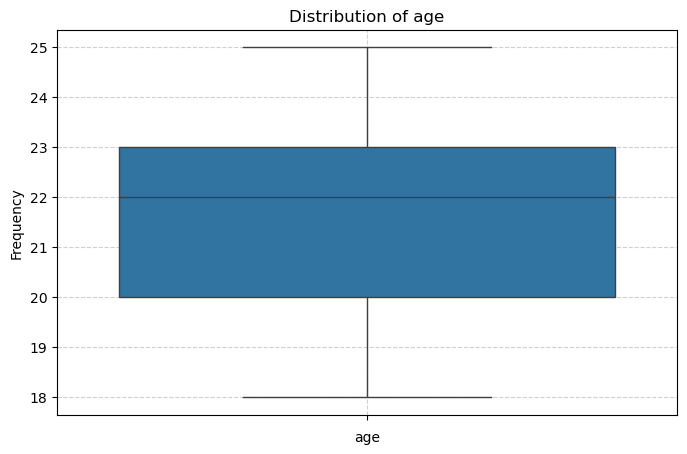

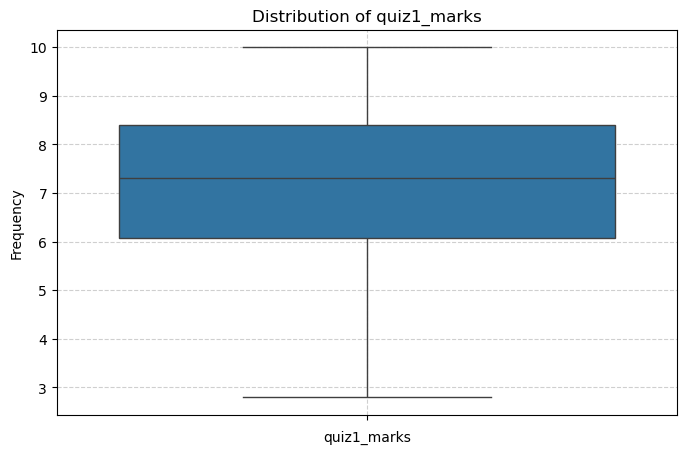

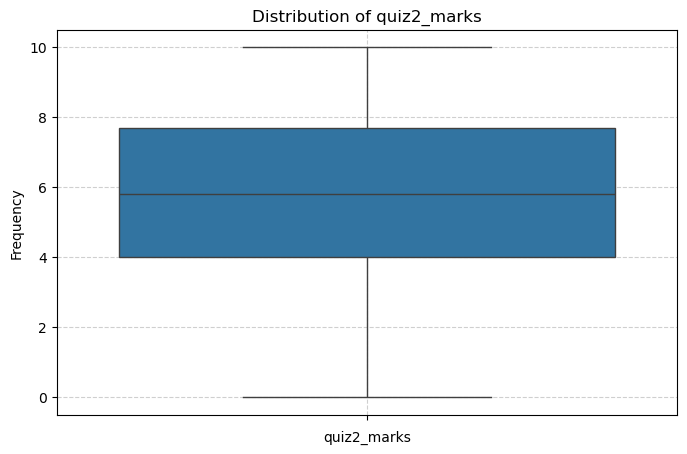

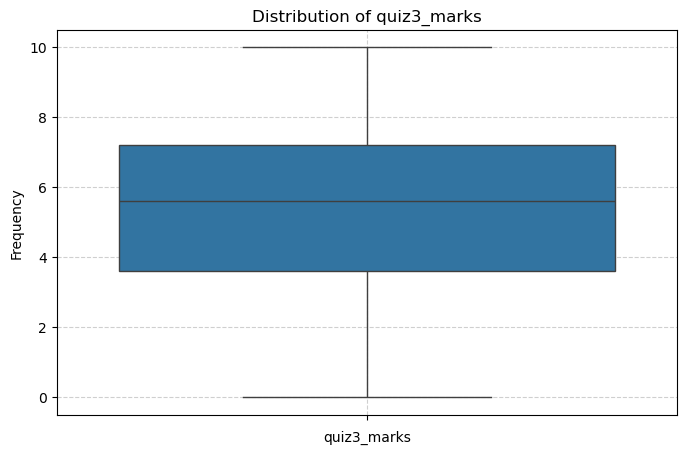

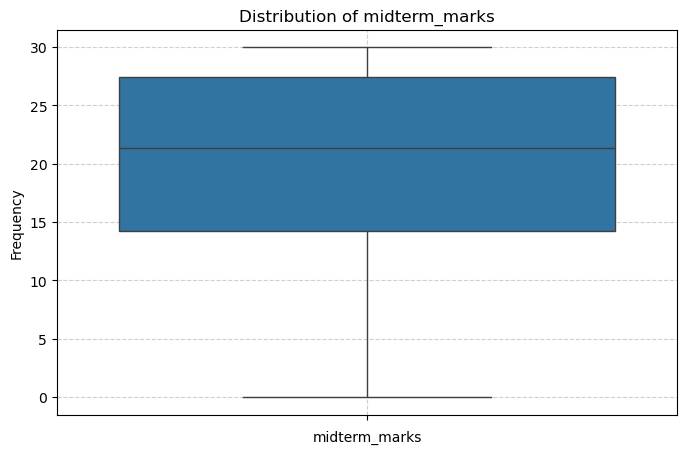

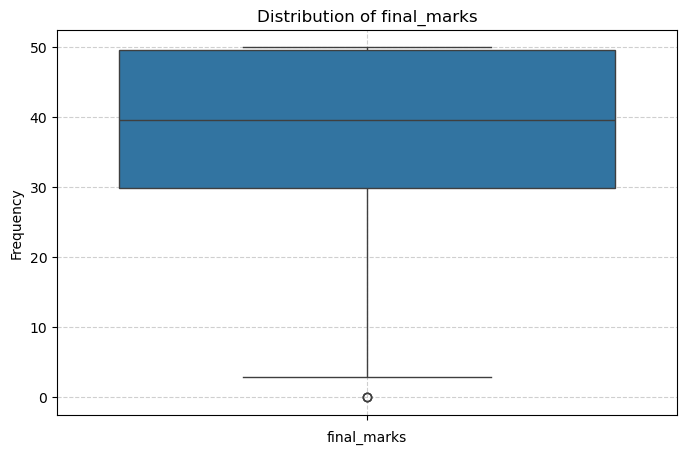

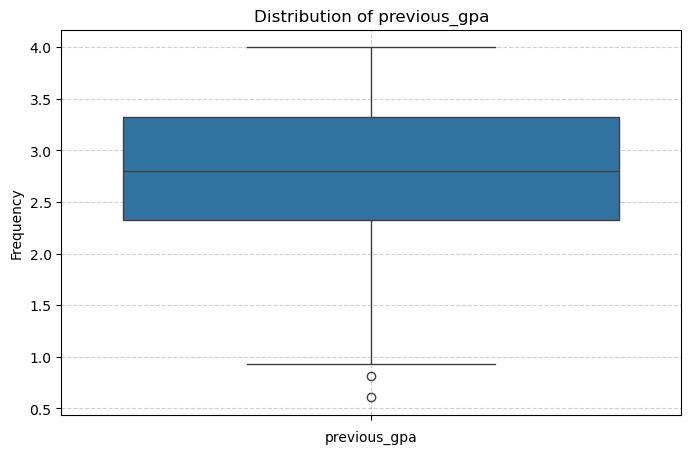

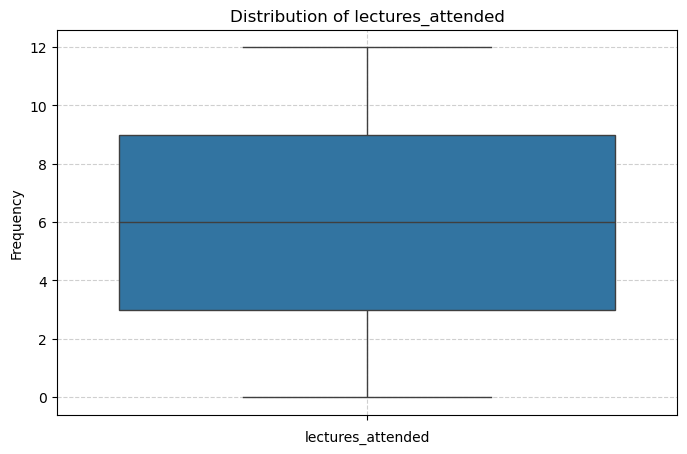

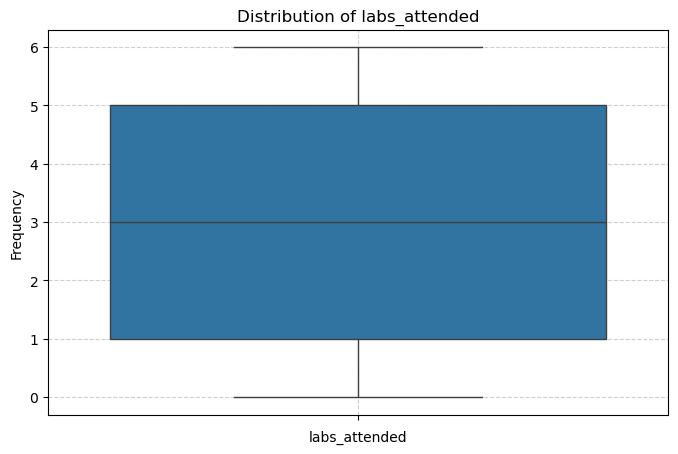

In [179]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

There's an outliers in some of the boxplot. But it's not that much of a distance in the distribution. So, I think there's no need to further clean the outliers. Although there is final_marks that shows most students score between roughly 30 and 50 on the final exam, while the lower whisker extends much further (plus there's also one outliers on 0).


In [180]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    int64  
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 23.6 KB


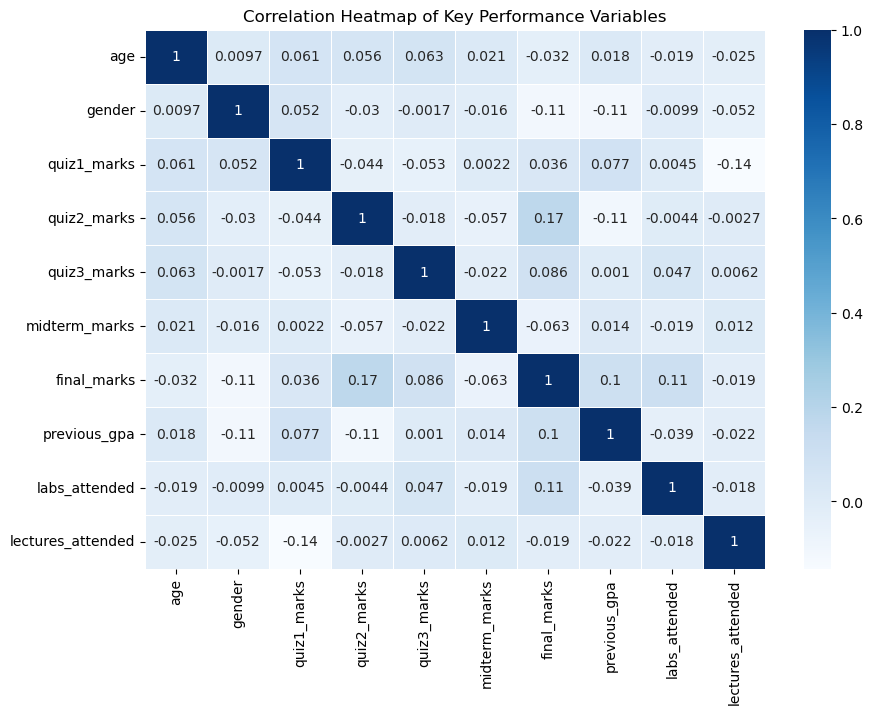

In [181]:
# Select relevant columns
corr_cols = [
    'age', 'gender',
    'quiz1_marks', 'quiz2_marks', 'quiz3_marks',
    'midterm_marks', 'final_marks',
    'previous_gpa',
    'labs_attended', 'lectures_attended'
]

plt.figure(figsize=(10, 7))
sns.heatmap(df_encoded[corr_cols].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title("Correlation Heatmap of Key Performance Variables")
plt.show()

The correlation heatmap shows that most variables have weak relationships with each other. The few high ones are final_marks have small positive correlations with quiz_marks and previous_gpa, suggesting that students who perform slightly better in quizzes or have a stronger academic background tend to score a bit higher on the final. Attendance both labs or lectures shows almost no correlation with performance, indicating that attendance alone does not strongly predict exam results in this dataset. Overall, the heatmap suggests that student performance is influenced by multiple small factors rather than one dominant variable.


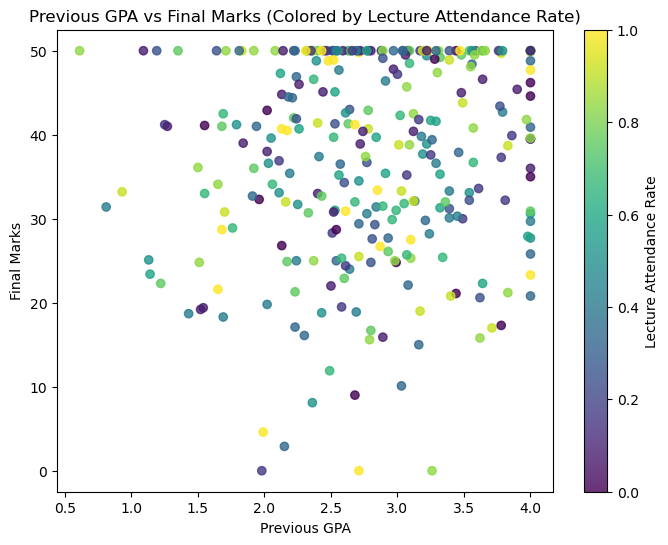

In [182]:
df_encoded['lecture_attendance_rate'] = df_encoded['lectures_attended'] / df['total_lectures']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_encoded['previous_gpa'],
    df_encoded['final_marks'],
    c=df_encoded['lecture_attendance_rate'],
    cmap='viridis',
    alpha=0.8
)

plt.colorbar(scatter, label='Lecture Attendance Rate')
plt.xlabel('Previous GPA')
plt.ylabel('Final Marks')
plt.title('Previous GPA vs Final Marks (Colored by Lecture Attendance Rate)')
plt.show()

The scatter plot shows a weak upward trend, meaning students with higher previous_gpa tend to score higher on the final_marks, but the relationship isn’t strong. The color pattern (attendance rate) also doesn’t form a clear gradient, so attending more lectures doesn’t automatically guarantee a higher final score. This suggests that performance isn’t always driven by a single factor, but students may rely on different study habits, or some learn effectively even with lower attendance. For teaching/learning, it means instructors shouldn’t assume that past GPA or attendance alone predicts.


###  Data Transformation & PCA

In [183]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      300 non-null    int64  
 1   gender                   300 non-null    int64  
 2   quiz1_marks              300 non-null    float64
 3   quiz2_marks              300 non-null    float64
 4   quiz3_marks              300 non-null    float64
 5   midterm_marks            300 non-null    float64
 6   final_marks              300 non-null    float64
 7   previous_gpa             300 non-null    float64
 8   lectures_attended        300 non-null    int64  
 9   labs_attended            300 non-null    int64  
 10  lecture_attendance_rate  300 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 25.9 KB


In [184]:
df_encoded = df_encoded.drop(columns='lecture_attendance_rate')

In [185]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


In [186]:
pca = PCA(n_components=10) 

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]])

In [187]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

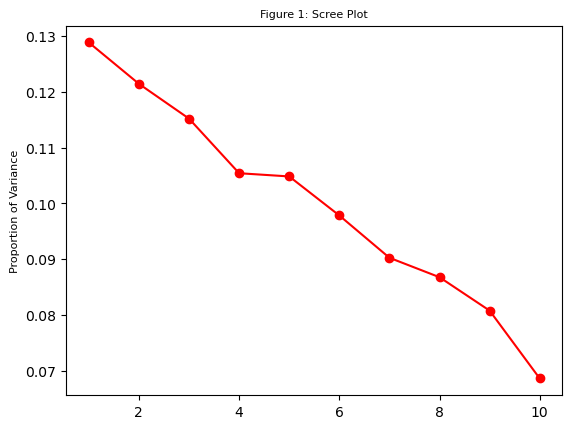

In [188]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [189]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the results, the first 5 principal components explain 18.64% + 11.71% + 10.65% + 9.67% + 9.54% = 60.21% of the total variance. This means that more than half of the dataset’s overall variability can already be captured using just the first five components.


But, if we want to achieve 70-80, we need to use up until PC7

In [190]:
pca = PCA(n_components=7)
PC = pca.fit_transform(df_transformed)

In [191]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022


### PCA Visualization

In [192]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


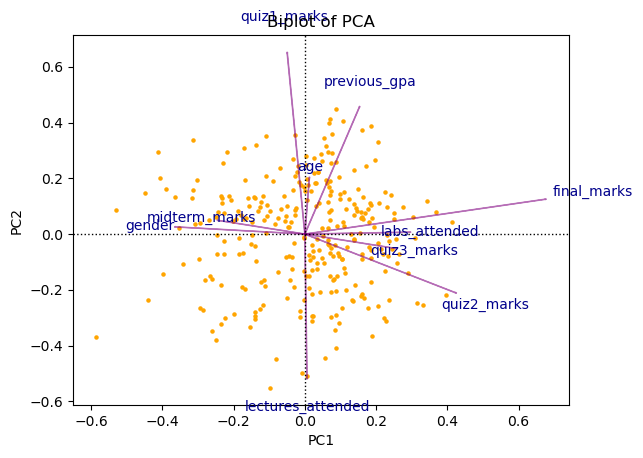

In [193]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

PC1 seems to be dominated by lecture_attendance_rate, lectures_attended, and labs_attended. In which all the attendances related variables pointing strongly to the right in the biplot. PC1 represents an overall student attendance/participation factor. Students with higher PC1 values are the ones who attend more lectures/labs and generally show higher engagement.

While PC2 captures a student performance factor on how well students score on quizzes, midterm, and final, as well as their past gpa.

On each PC, PC1:
1. lecture_attendance_rate (strongest loading)
2. lectures_attended
3. labs_attended

PC2:
1. final_marks 
2. quiz2_marks, quiz3_marks, quiz1_marks
3. previous_gpa

are the most important on each PC.

### Clustering (K-Means)

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

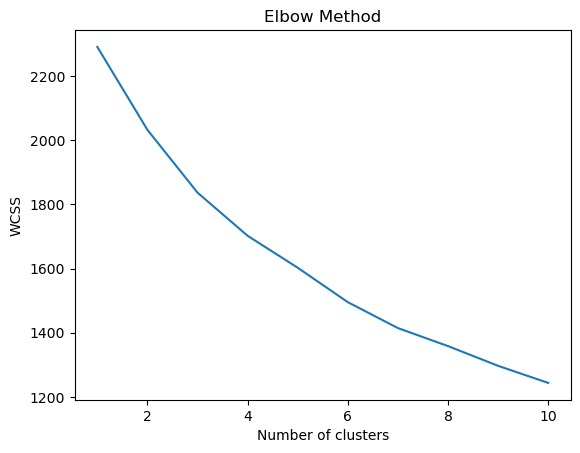

In [194]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [195]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2291.317393
1                   2  2032.672557
2                   3  1836.710145
3                   4  1702.223811
4                   5  1602.566677
5                   6  1495.180117
6                   7  1414.351550
7                   8  1358.132279
8                   9  1296.604987
9                  10  1243.300570


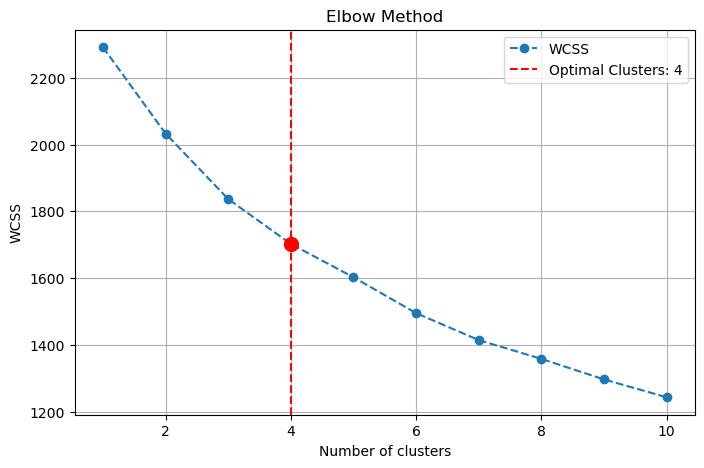

The optimal number of clusters is: 4


In [196]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [197]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [198]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10949104921197117


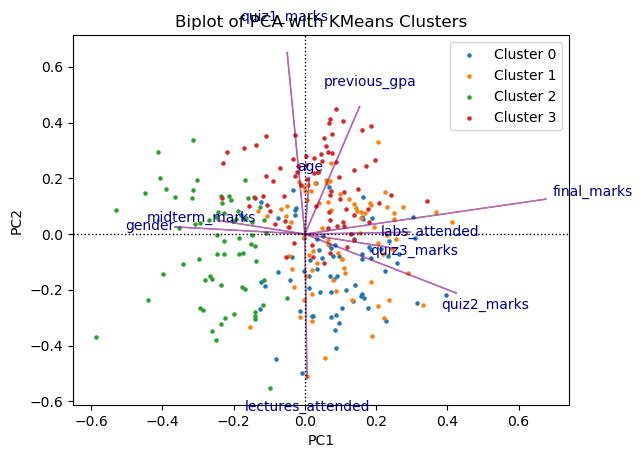

In [199]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

There's quite a distribution in between the clusters. Especially cluster 3 (the red one). Although it's still undeniably skewed upwards.

In [200]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,2
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,3
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,2
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,2
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0


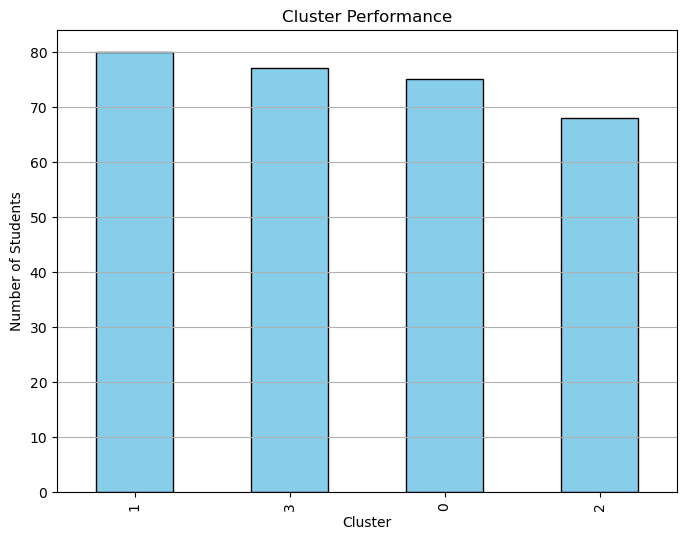

In [201]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Performance')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

This bar shows the amount of students on each cluster. There's a different in the amount, but not much. The hihgest one placed in  cluster 1. Based on the profiling below, this means that there's quite a lot of student who needs urgent support from the academic. 

#### Cluster Profiling
Cluster 0: good attendance, solid quiz results, and stable engagement – high performers.

Cluster 1: low attendance, weak quiz scores, and minimal participation – students needing urgent support.

Cluster 2: mixed attendance, moderate quiz marks, and okay participation – average performers.

Cluster 3: generally better previous gpa, decent quiz scores, and slightly stronger engagement – academically promising students.

#### Interpretation via PCA biplot
From the PCA biplot, the four clusters spread out along PC1 and PC2 depending on how they relate to key academic variables. Cluster 0 appears on the side associated with better attendance, more lab activity, and higher final marks, which matches their stronger performance. 

Cluster 1 falls in the region tied to lower quiz scores and weak engagement, explaining why they fall into the at-risk category. 

Cluster 2 sits somewhere in the middle, showing a balance of both moderate strengths and weaknesses. 

Cluster 3 leans toward variables like previous gpa and some mid-to-high quiz indicators, suggesting that they generally have good academic potential compared to the other groups.


#### Actionable Recommendations
Provide targeted remedial support for cluster 1. Maybe focus more on attendance monitoring, quiz assistance, and better academic teaching.

Offer mentoring, enrichment sessions, or advanced study opportunities for cluster 0 to maintain and further develop their high performance.

Create engagement boosting policies (maybe give them a rewards or something if they managed to get the allocated attendance in a standard terms), lab based projects, or interactive learning sessions, to help cluster 2 move toward stronger academic outcomes.

Bonus, since there's 4 cluster: give additional academic development programs for cluster 3, maybe additional study skill programs, to help maximize their potential since they already show good gpa background and decent quiz performance.